In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Zawadi\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
Path_to_data = "../data/AdSmartABdata.csv"
#Read data from csv file
db = pd.read_csv(Path_to_data, na_values=['?', None])

#Display sample of the data
db.sample(10)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
1553,33694f8b-5995-44f6-8b46-7aad3af39bd4,exposed,2020-07-05,3,iPhone,5,Mobile Safari,0,0
6499,ce14e80e-6164-486d-99f4-b44d4b20c686,exposed,2020-07-04,3,Generic Smartphone,6,Chrome Mobile,0,1
5462,acb0a597-3ca3-4639-8ff2-ce5c29e20569,exposed,2020-07-08,17,Generic Smartphone,6,Chrome Mobile,0,0
260,07afed09-d580-40a3-bea0-d4de642b5974,control,2020-07-08,16,Generic Smartphone,6,Chrome Mobile,0,0
4088,8345de9d-a8ff-493a-9ede-28cce9cfc7c4,control,2020-07-03,15,Samsung SM-G930L,6,Facebook,0,0
5957,bceb2001-2383-403e-b600-c40cffc9b5ac,exposed,2020-07-09,1,iPhone,5,Mobile Safari,0,0
6985,ddf1b65e-82cc-409a-b4e9-16aabd8ed1ae,exposed,2020-07-09,8,Samsung SM-G935U,6,Chrome Mobile WebView,0,0
1312,2ad4f2d4-6e6a-44e3-a45f-84b9ce044e84,control,2020-07-10,7,Samsung SM-G950F,6,Facebook,0,1
5111,a2a880da-5055-4b52-9164-082d70edb1c0,exposed,2020-07-09,17,POT-LX1,6,Facebook,0,0
964,1f6b0486-238e-402a-9b2b-68b8dc457431,control,2020-07-08,12,Samsung SM-G955F,6,Chrome Mobile,0,0


In [6]:
def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

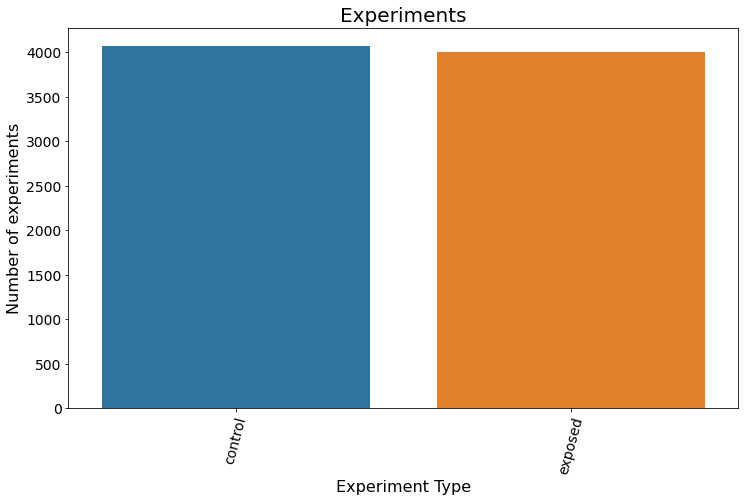

In [7]:
experiments = db[["experiment"]].groupby('experiment').agg({'experiment':'count'}).rename(columns = {'experiment' : 'count'}).reset_index()
experiments = experiments.sort_values(by="count", ascending=False)
plot_bar(experiments, 'experiment', 'count', 'Experiments', 'Experiment Type', 'Number of experiments')

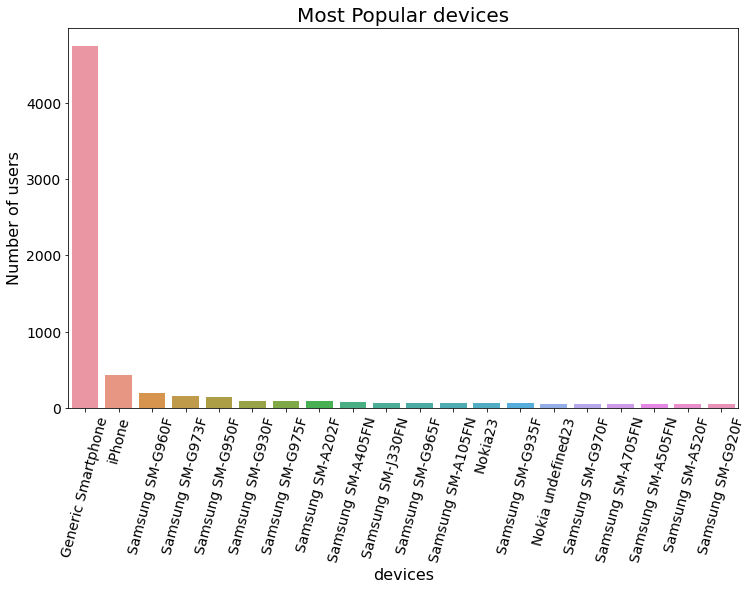

In [8]:
handsets = db[["device_make"]].groupby('device_make').agg({'device_make':'count'}).rename(columns = {'device_make' : 'count'}).sort_values(by="count", ascending=False).head(20).reset_index()
handsets.head()
plot_bar(handsets, 'device_make', 'count', 'Most Popular devices', 'devices', 'Number of users')

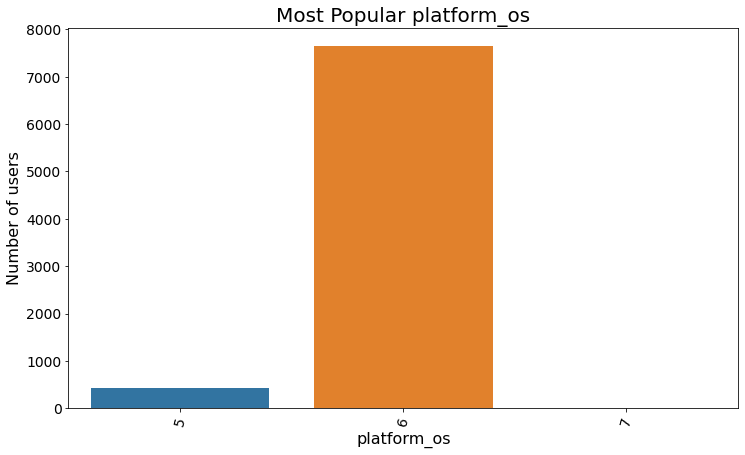

In [9]:
OS = db[["platform_os"]].groupby('platform_os').agg({'platform_os':'count'}).rename(columns = {'platform_os' : 'count'}).reset_index()
OS.head()
plot_bar(OS, 'platform_os', 'count', 'Most Popular platform_os', 'platform_os', 'Number of users')


In [ ]:
browser = db[["browser"]].groupby('browser').agg({'browser':'count'}).rename(columns = {'browser' : 'count'}).reset_index()
browser = browser.sort_values(by="count", ascending=False).head(20)
plot_bar(browser, 'browser', 'count', 'Most Popular Browsers', 'Browser Type', 'Number of users')
